# Neural Network

In [25]:
import numpy as np
from scipy.misc import imresize
from scipy.special import expit
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')


In [26]:
def downSampling(l):
	l = l.reshape((32,32))
	newimg = imresize(l, (8,8),interp='nearest').flatten()
	l = newimg
	return l

#sigmoid function

In [27]:
def sigMoid(x, deriv=False):
	if(deriv==True):
		return(sigMoid(x)*(1-sigMoid(x)))
		
	return expit(x)

#reading Data

In [28]:
def readData( file_name ):
	with open(file_name, "r") as ins:
		for _ in range(21):
			next(ins)
		array = []
		y = []
		temp =''
		for line in ins:
			line = line.strip()
			if len(line)>2:
				temp=temp+line
			if len(line) == 1:
				if int(line) == 2 or int(line) == 4 or int(line) == 9 :

					array.append(np.int64(list(temp)))
					temp = ''
					y.append(int(line))
				temp = ''


	X = []
	for i in array:
		temp = downSampling(i)
		X.append(temp)
	#print(y)
	z = np.ones((len(X),1))
	X = np.append(X,z, axis=1)

	Y = np.zeros((len(y),10))
	for i in range(len(y)):
		Y[i][y[i]]=1
	y = Y
	x = X
	return x , y

Training and testing of data

In [29]:
hiddenList = [i for i in range(1,101,15)]
accuracyList = []
for i in range(len(hiddenList)):
	x, y =readData("optdigits-orig.tra") 

	#seed
	np.random.seed(1)

	nHidden = hiddenList[i]
	outPut  = 10

	#synapses

	wl0 = 2*np.random.random((len(x[0]),nHidden)) - 1
	wl1 = 2*np.random.random((nHidden,outPut)) - 1
	# l0 l1 l2 are the layer  of neural network
	#training 
	for j in range(5000):
		#layers
		l0 = x
		l1 = sigMoid(np.dot(l0, wl0))
		l2 = sigMoid(np.dot(l1, wl1))
		
		#backpropagation
		l2_error = y - l2

		#calulate deltas
		l2_delta = l2_error*sigMoid(l2, deriv=True)
		l1_error = l2_delta.dot(wl1.T)
		l1_delta = l1_error*sigMoid(l1, deriv=True)

		#update our synapses
		wl1 += l1.T.dot(l2_delta)
		wl0 += l0.T.dot(l1_delta)

	# testing of neural network
	print(wl0)
	print(wl1)
	x , y = readData("optdigits-orig.cv")

	l0 = x
	l1 = sigMoid(np.dot(l0, wl0))
	l2 = sigMoid(np.dot(l1, wl1))

	l2_error = y - l2
	#print ('Error' + str(np.mean(np.abs(l2_error))))

	s = 0
	for i in range(len(y)):
		if np.argmax(y[i]) == np.argmax(l2[i]):
			#print(np.argmax(y[i]))
			#print(np.argmax(l2[i]))
			s+=1

	#print('Acc:',s*1.0/len(y))
	accuracyList.append(round(s*1.0/len(y)*100,2))

[[ -1.65955991e-01]
 [ -1.12660749e+04]
 [ -2.94692572e+05]
 [ -2.70314775e+05]
 [ -1.03538507e+05]
 [ -1.21553320e+04]
 [ -2.42116757e+02]
 [ -3.86192037e+04]
 [ -2.06465052e-01]
 [ -1.07689858e+05]
 [ -2.98548565e+05]
 [ -9.99940630e+04]
 [ -2.16023417e+05]
 [ -1.06436191e+05]
 [  3.17922544e+04]
 [ -1.42460161e+04]
 [ -1.65390395e-01]
 [ -1.23963496e+05]
 [ -7.19165691e+04]
 [ -2.15355544e+03]
 [ -2.35796253e+05]
 [ -1.02554384e+05]
 [  4.93253413e+04]
 [  3.84645231e-01]
 [  7.52778305e-01]
 [  6.39947794e+03]
 [  4.08325435e+04]
 [ -9.11917867e+04]
 [ -2.16318070e+05]
 [ -6.15677387e+03]
 [  5.12887022e+04]
 [ -1.57784750e-01]
 [  9.15779060e-01]
 [  1.00779238e+05]
 [  8.07434698e+04]
 [ -1.03367100e+05]
 [ -6.98302282e+04]
 [  6.70203575e+04]
 [ -9.36763926e+02]
 [  5.00288630e-01]
 [  2.38039410e+04]
 [  4.61251892e+04]
 [ -4.79148849e+04]
 [ -1.10102061e+05]
 [ -3.41553146e+04]
 [  2.90849132e+04]
 [  7.69425108e+03]
 [ -4.12771703e-01]
 [  2.20982005e+04]
 [ -4.67293194e+04]


plotting Result

[1, 16, 31, 46, 61, 76, 91]
[0.0, 95.25, 97.63, 96.27, 96.27, 97.29, 96.27]


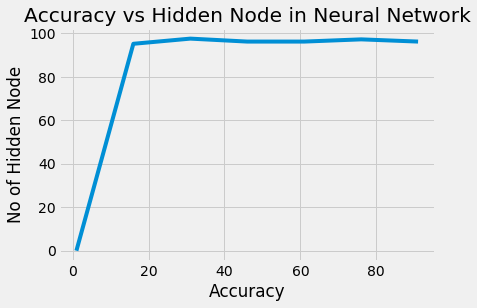

In [30]:
print(hiddenList)
print(accuracyList)
plt.xlabel('Accuracy')
plt.ylabel('No of Hidden Node')
plt.title('Accuracy vs Hidden Node in Neural Network')
plt.plot(hiddenList,accuracyList)
plt.show()

The accuracy of network increases with the value of Nh but after some values it decreases also due to overfitting

<img src="nn.jpg">